<a href="https://colab.research.google.com/github/hwuiwon/predict-house-price/blob/master/Predict_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **predict-house-price**

This project will utilize Keras' Boston housing price regression [dataset](https://keras.io/datasets).

[Github Repo](https://github.com/hwuiwon/predict-house-price)

## **Importing Required Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

We will load the data by using the method Keras recommends.

In [0]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [44]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


We can see that there are total 506 house data in the set with 13 features.

> **CRIM**: Per capita crime rate by town
<br>**ZN**: Proportion of residential land zoned for lots larger than 25,000 sq.ft.
<br>**INDUS**: Proportion of non-retail business acres per town.
<br>**CHAS**: Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
<br>**NOX**: Nitric oxides concentration (parts per 10 million)
<br>**RM**: Average number of rooms per dwelling
<br>**AGE**: Proportion of owner-occupied units built prior to 1940
<br>**DIS**: Weighted distances to five Boston employment centers
<br>**RAD**: Index of accessibility to radial highways
<br>**TAX**: Full-value property-tax rate per \$10,000
<br>**PTRATIO**: Pupil-teacher ratio by town
<br>**B**: Calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
<br>**LSTAT**: Percentage lower status of the population
<br>**MEDV**: Median value of owner-occupied homes in \$1000

We will convert array to DataFrame to see labels with values.

In [45]:
boston = pd.DataFrame(x_train, 
                  index=[i for i in range(x_train.shape[0])], 
                  columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston['MEDV'] = y_train

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [46]:
# Generate descriptive statistics
boston.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.75,11.48,11.10,0.06,0.56,6.27,69.01,3.74,9.44,405.90,18.48,354.78,12.74,22.40
std,9.24,23.77,6.81,0.24,0.12,0.71,27.94,2.03,8.70,166.37,2.20,94.11,7.25,9.21
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,188.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.13,0.00,0.45,5.87,45.48,2.08,4.00,279.00,17.23,374.67,6.89,16.67
50%,0.27,0.00,9.69,0.00,0.54,6.20,78.50,3.14,5.00,330.00,19.10,391.25,11.40,20.75
75%,3.67,12.50,18.10,0.00,0.63,6.61,94.10,5.12,24.00,666.00,20.20,396.16,17.09,24.80
max,88.98,100.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,22.00,396.90,37.97,50.00


## **Analyzing relationships**

We will now create a heatmap to plot the correlation matrix to see the relationships between the variables.

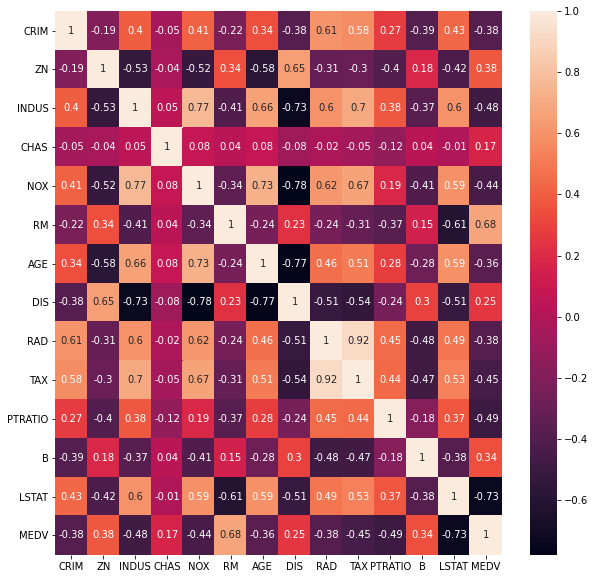

In [47]:
correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"fontsize":10})

The correlation coefficient ranges from -1 to 1. If the absolute value is close to 1, it means that there is a strong positive correlation between the two variables and vice versa.

The features of interest are the ones with a high correlation with the target variable 'MEDV'. In this case, we will pick 'RM' and 'LSTAT' as their absolute value is greater than 0.5.

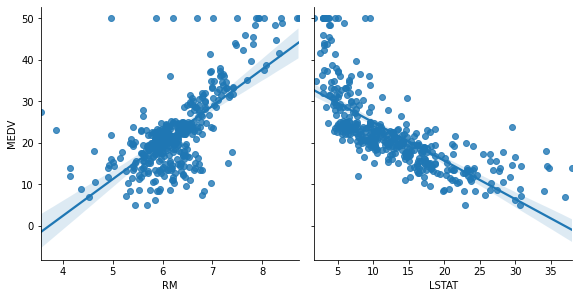

In [48]:
g = sns.PairGrid(boston, y_vars=['MEDV'], x_vars=['RM', 'LSTAT'], height=4)
g.map(sns.regplot)

We will only include 'RM', 'LSTAT', and 'MEDV' in our data set for accuracy of our model.

In [0]:
bostonT = pd.DataFrame(x_test, 
                  index=[i for i in range(x_test.shape[0])], 
                  columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

X_train = pd.DataFrame(np.c_[boston['RM'], boston['LSTAT']], columns = ['RM','LSTAT'])
X_test = pd.DataFrame(np.c_[bostonT['RM'], bostonT['LSTAT']], columns = ['RM','LSTAT'])

## **Training the Model**

We will train the model using LinearRegression from scikit-learn.

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We will check the coefficient and intercept of our linear regression model.

In [51]:
print(pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient']))
print(model.intercept_)

       Coefficient
RM        4.866252
LSTAT    -0.636989
0.01361359430417508


## **Evaulating**

We will now check the predicted values and the actual values.

In [52]:
y_pred = model.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred.head()

,Actual,Predicted
0,7.2,12.818543
1,18.8,18.462167
2,19.0,22.933857
3,27.0,26.924248
4,22.2,24.423753


We will plot the y_test vs y_pred. Ideally, it should have been a **straight line**.

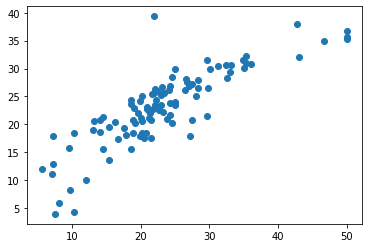

In [53]:
plt.scatter(y_test, y_pred)
plt.show()

To evaluate the model in detail, we will use the R2-score.

In [54]:
from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

r2T = r2_score(y_test, y_pred)
print("\nThe model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2T))

The model performance for training set
--------------------------------------
R2 score is 0.6222162281754451

The model performance for testing set
--------------------------------------
R2 score is 0.700683951997074


This implies **70.01%** of variation is explained by the target variable.

We will try to improve the accuracy of a model.

## **Improving the model**

### **Preprocessing the data**

#### **Removing outliers**

We will use a Z-score function defined in scipy library to detect the outliers and remove them.

In [0]:
from scipy import stats

z = np.abs(stats.zscore(boston))
threshold = 3
boston_new = boston[(z < 3).all(axis=1)]

We removed data that had z score greater than 3.<br>Let's see the results.

In [56]:
print(boston.shape)
print(boston_new.shape)

(404, 14)
(329, 14)


We will now train the model with our modified set.

In [0]:
X_train_new = pd.DataFrame(np.c_[boston_new['RM'], boston_new['LSTAT']], columns = ['RM','LSTAT'])
Y_train_new = pd.DataFrame(np.c_[boston_new['MEDV']], columns = ['MEDV'])

In [58]:
model2 = LinearRegression()
model2.fit(X_train_new, Y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### **Results: outliers removed**

We will use the R2-score to evaluate the model in detail.

In [59]:
y_pred_train_new = model2.predict(X_train_new)
y_pred_test_new = model2.predict(X_test)

r2 = r2_score(Y_train_new, y_pred_train_new)
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

r2T = r2_score(y_test, y_pred_test_new)
print("\nThe model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2T))

The model performance for training set
--------------------------------------
R2 score is 0.6901016853316007

The model performance for testing set
--------------------------------------
R2 score is 0.6847957414651276


It seems that the accuracy of our training set has improved by 7%, but the overall accuracy is still under 70%.

We will now standardize the data and see if it has any significant effects in our model.

#### **Standarization**

We will standarize the data by using the mean and standard deviation.

In [0]:
train_mean = np.mean(X_train_new, axis=0)
train_std = np.std(X_train_new, axis=0)
X_train_new_scaled = (X_train_new - train_mean) / train_std
X_test_new_scaled = (X_test - train_mean) / train_std

Now we will trian the model with standatized data sets.

In [61]:
model3 = LinearRegression()
model3.fit(X_train_new_scaled, Y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We will use the R2-score to evaluate the model in detail.

In [64]:
y_pred_train_new_scaled = model3.predict(X_train_new_scaled)
y_pred_test_new_scaled = model3.predict(X_test_new_scaled)

r2 = r2_score(Y_train_new, y_pred_train_new_scaled)
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

r2T = r2_score(y_test, y_pred_test_new_scaled)
print("\nThe model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2T))

The model performance for training set
--------------------------------------
R2 score is 0.6901016853316007

The model performance for testing set
--------------------------------------
R2 score is 0.684795741465127


There were no significant change in model's accuracy.

There can be various reasons why we are getting low accuracy. I believe this might be happening because there are only a small number of samples that can be used to train the model or there are other features that decide the price of a house that are not in this data set.